# Hack the Fake News

## Setup and import libraries

In [1]:
# Automatically reloading imported modules
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

pd.set_option('display.max_columns', None)

In [3]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
df_training = pd.read_excel('data/FN_Training_Set.xlsx')
df_validation = pd.read_excel('data/FN_Validation_Set.xlsx')

df = pd.concat([df_training, df_validation], ignore_index=True)

## General descriptive analysis

Let's check shape of the data - number of rows and attributes:

In [5]:
df.shape

(3576, 6)

Overview of the data:

In [6]:
df.head()

,fake_news_score,click_bait_score,Content Title,Content Url,Content Published Time,Content
0,1,1,Камил Хабиб: ДАЕШ и „Ан Нусра” са нов терорист...,http://a-specto.bg/kamil-habib-daesh-i-nusra-s...,2017-05-17 18:35:00,"Интервю на Десислава Пътева с Камил Хабиб, дек..."
1,1,1,ЧЕТИРИТЕ ТИПА ЖЕНИ СПОРЕД ИЗТОЧНИЯ КАЛЕНДАР,http://novini24online.com/jba/113526,2017-05-17 11:48:00,"Романтичната жена Това са жените, родени в год..."
2,1,1,Арт - Людмила Ким почита премиера за Ванга,http://paper.standartnews.com/bg/article.php?a...,2017-05-16 21:36:00,"Людмила Ким, най-популярната руска лечителка и..."
3,3,3,Истина или не ! Истина ли е дали Бойко е гей и...,http://fakenews.bg/Истина-или-не-Истина-ли-е-д...,2017-05-16 19:40:00,Истина или не ! Истина ли е дали Бойко е гей и...
4,1,1,"Видеото на Чарли Чаплин, в което няма да се см...",http://blife.eu/видеото-чарли-чаплин-което-ням...,2017-05-16 13:41:00,"Свикнали сме Чарли Чаплин да ни разсмива, да х..."


### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

In [7]:
df.dtypes

fake_news_score                    int64
click_bait_score                   int64
Content Title                     object
Content Url                       object
Content Published Time    datetime64[ns]
Content                           object
dtype: object

### Basic characteristics

In [8]:
df.describe()

,fake_news_score,click_bait_score
count,3576.000000,3576.000000
mean,2.383110,2.403803
std,0.923832,0.914974
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,3.000000,3.000000
max,3.000000,3.000000


In [9]:
df.describe(exclude=[np.number])

,Content Title,Content Url,Content Published Time,Content
count,3576,3575,3576,3568
unique,2530,3575,3253,2968
top,Chemtrails HAARP (химически следи в небето и Х...,http://mall359.com/-9892-obiavi.html,2017-04-18 17:02:00,Добро утро! Днес съм по-заспала и от вчера Ло...
freq,52,1,6,14
first,NaN,NaN,2016-11-17 21:07:00,NaN
last,NaN,NaN,2017-05-17 18:35:00,NaN


### One-value columns

Which attributes contain only one value?

In [10]:
one_value_attributes_analysis(df)

### Missing values

Analysis of missing values in attributes:

Content Url: 1 (0.03%)
Content: 8 (0.22%)

Missing values plot (inverse logic, plot is showing how many values are not NaN):


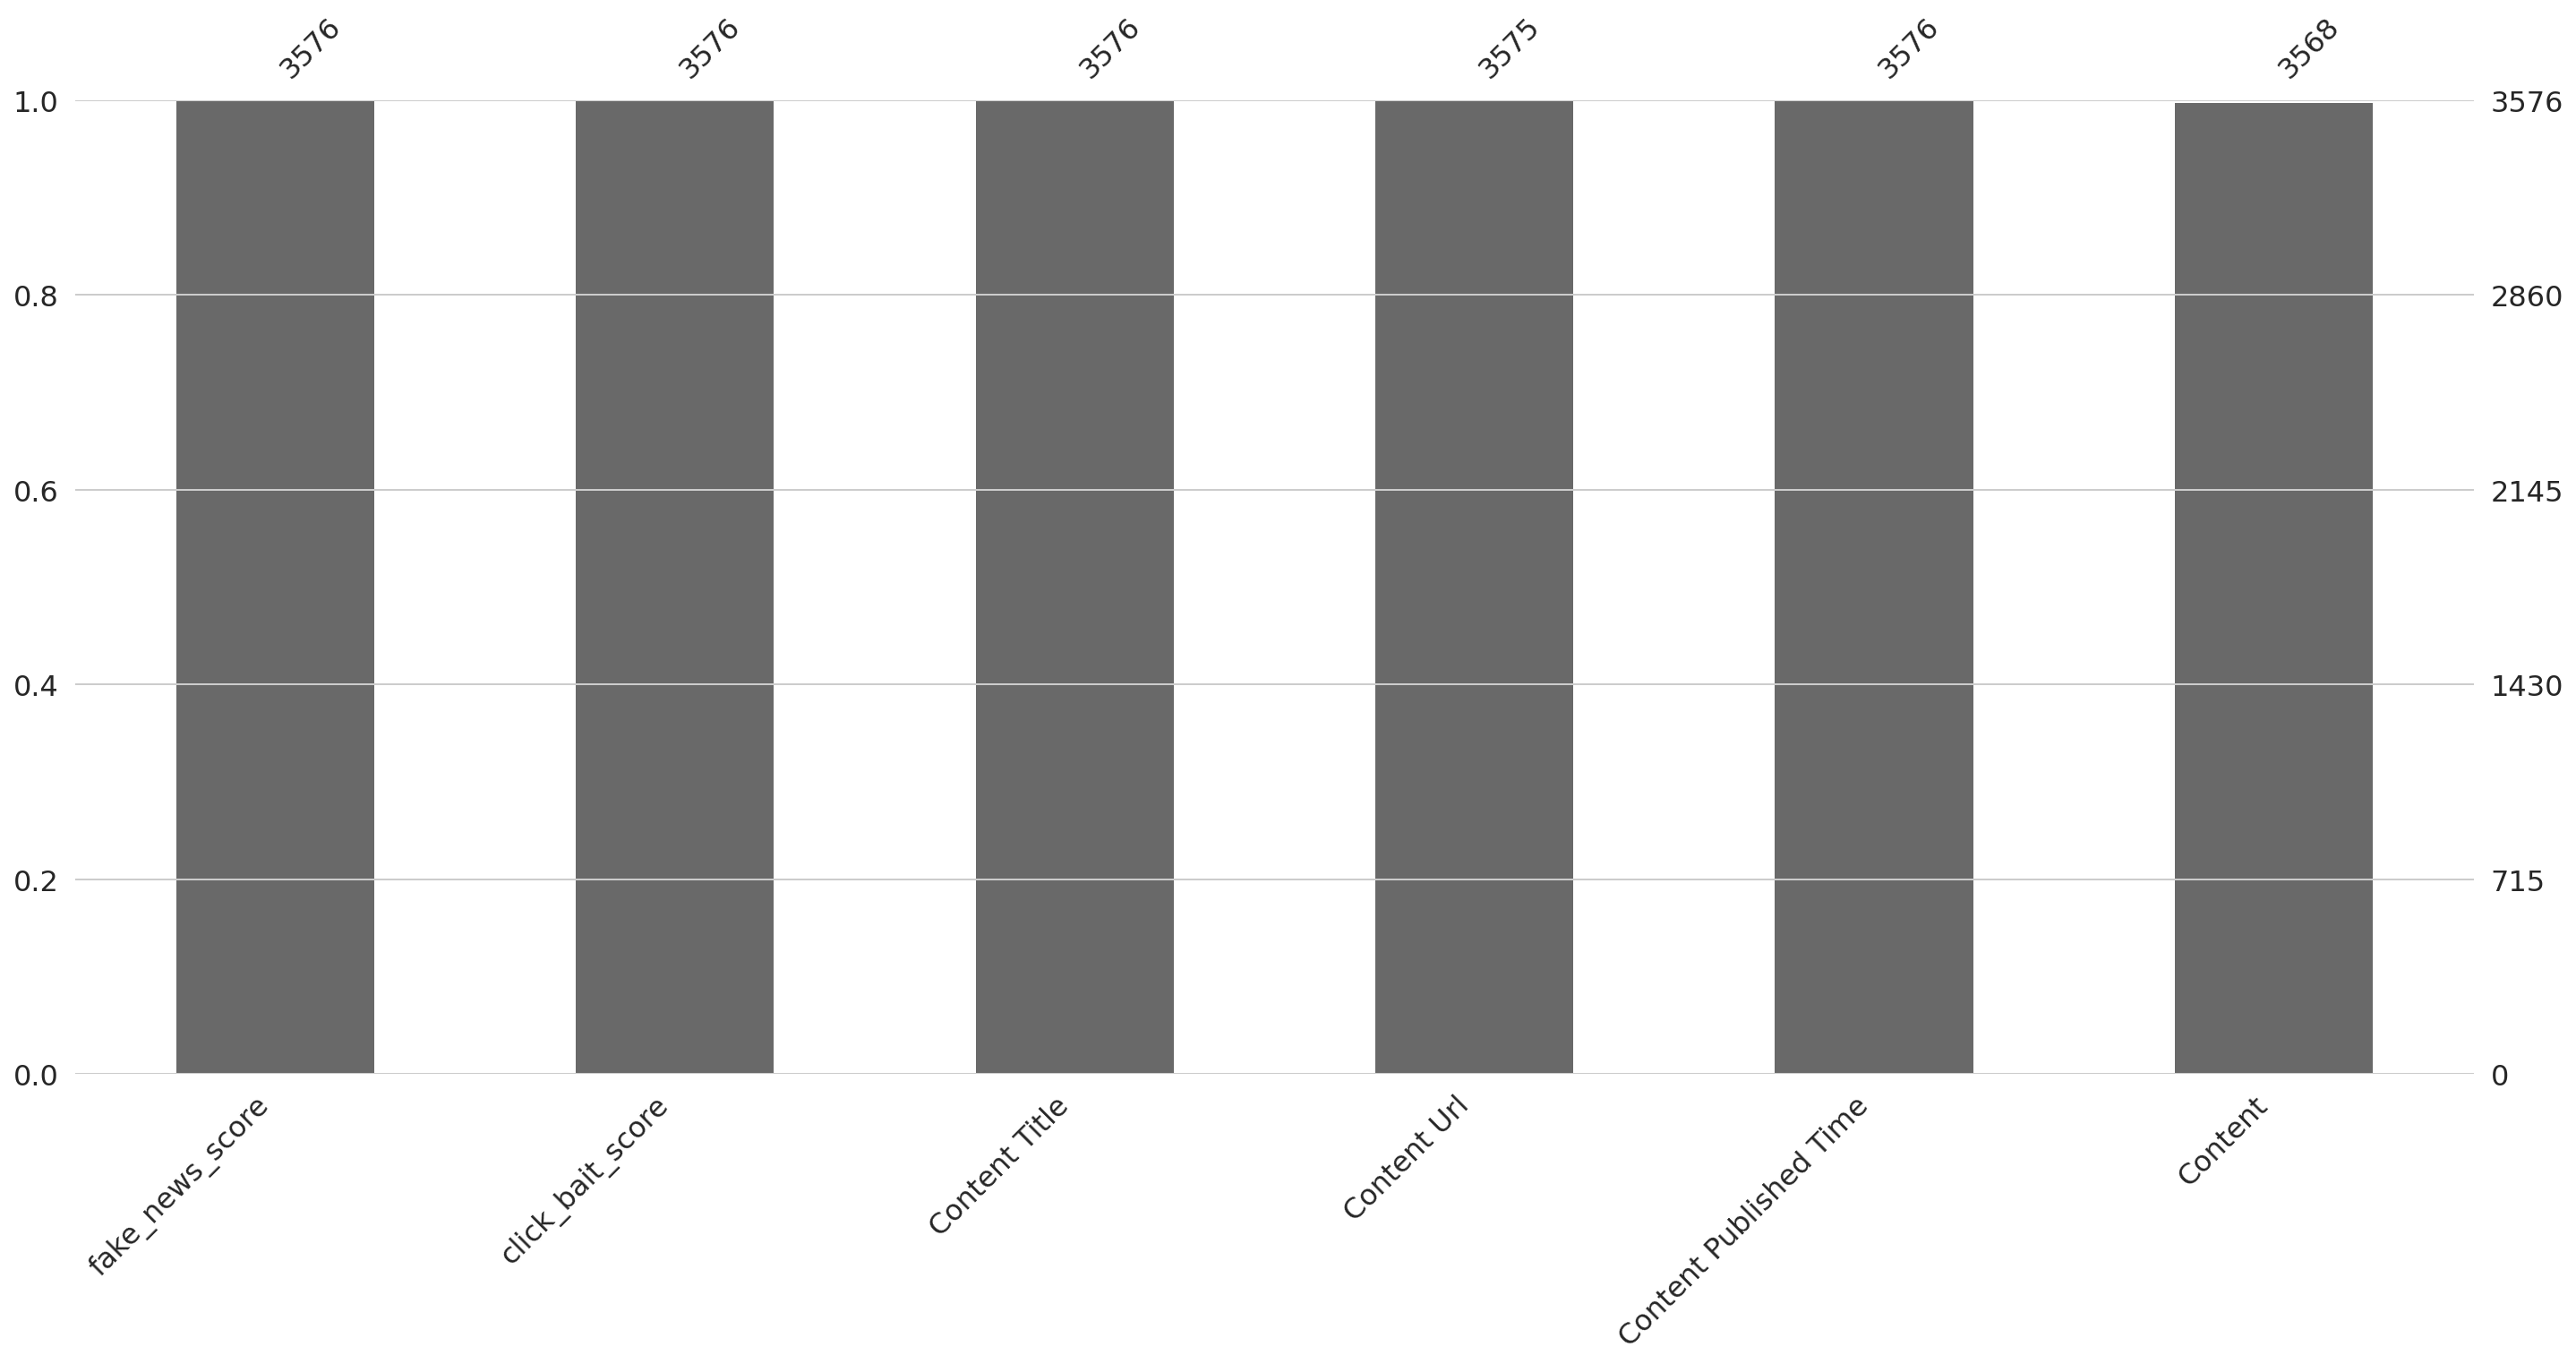

In [11]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [12]:
df.duplicated().any()

False

## Attributes analysis

Analysis of all attributes:

In [13]:
skip_attributes = [
    'Content Published Time', 'Content Url'
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
    'Content Title', 'Content'
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category', 'bool']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))

label_column = 'fake_news_score' # attribute considered as "label"

### Label attribute distribution

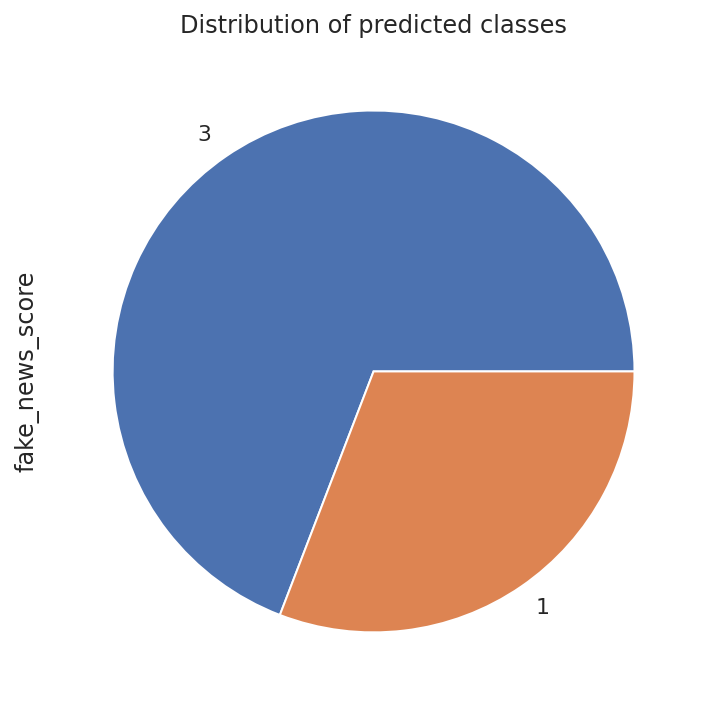

In [14]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

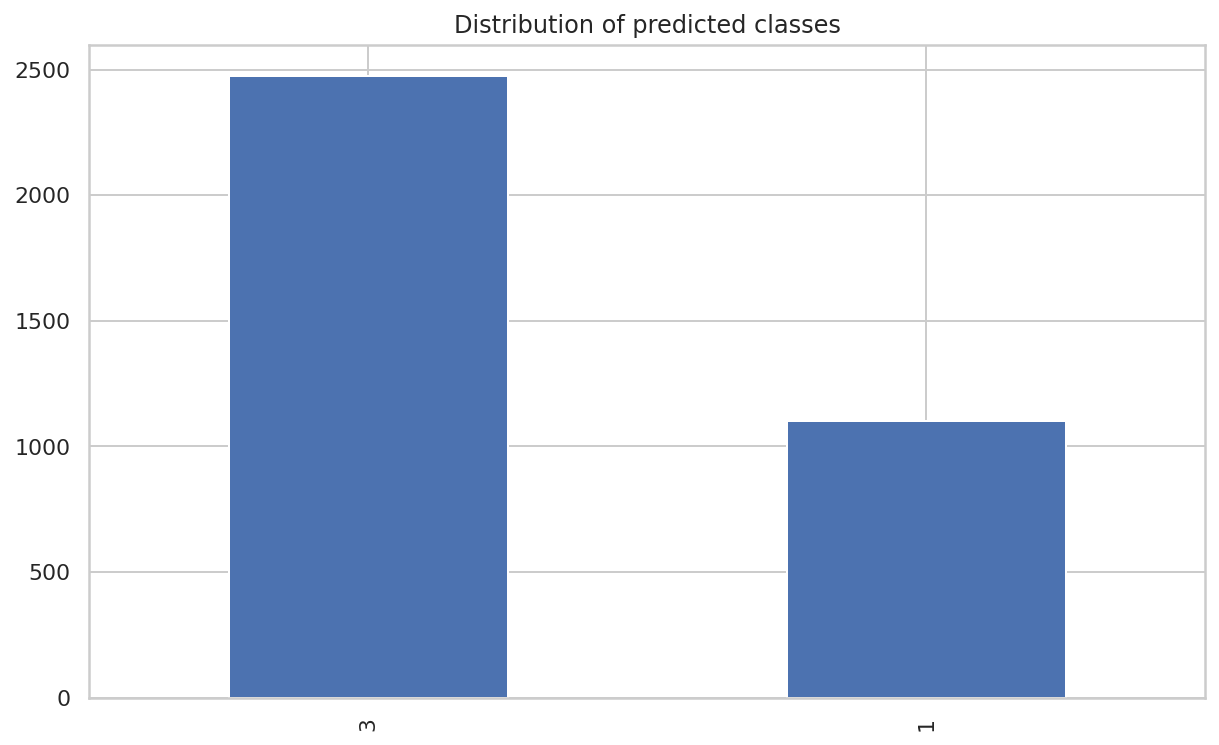

In [15]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:



Analysis of attribute "click_bait_score"


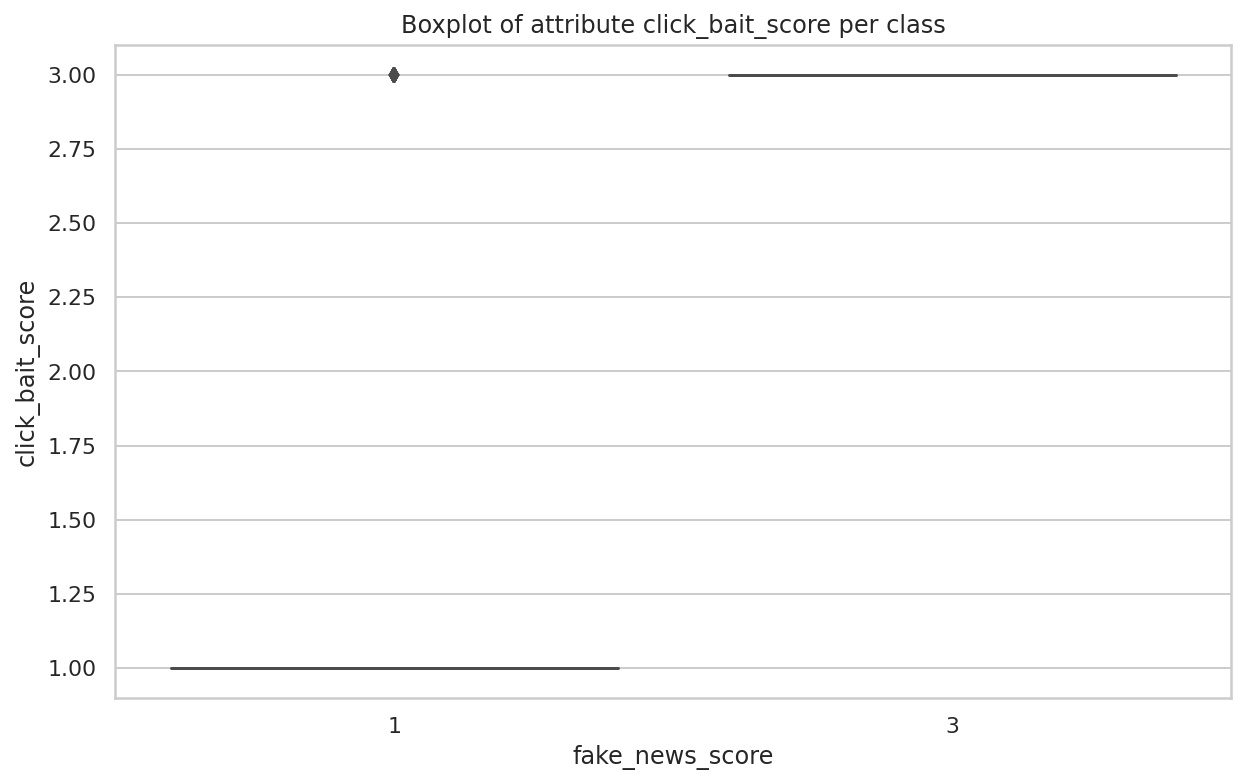

In [16]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

### Categorical attributes

Analysis of categorical attributes:

In [17]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

There are no attributes to be analysed.


### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:



Analysis of attribute "Content Title"


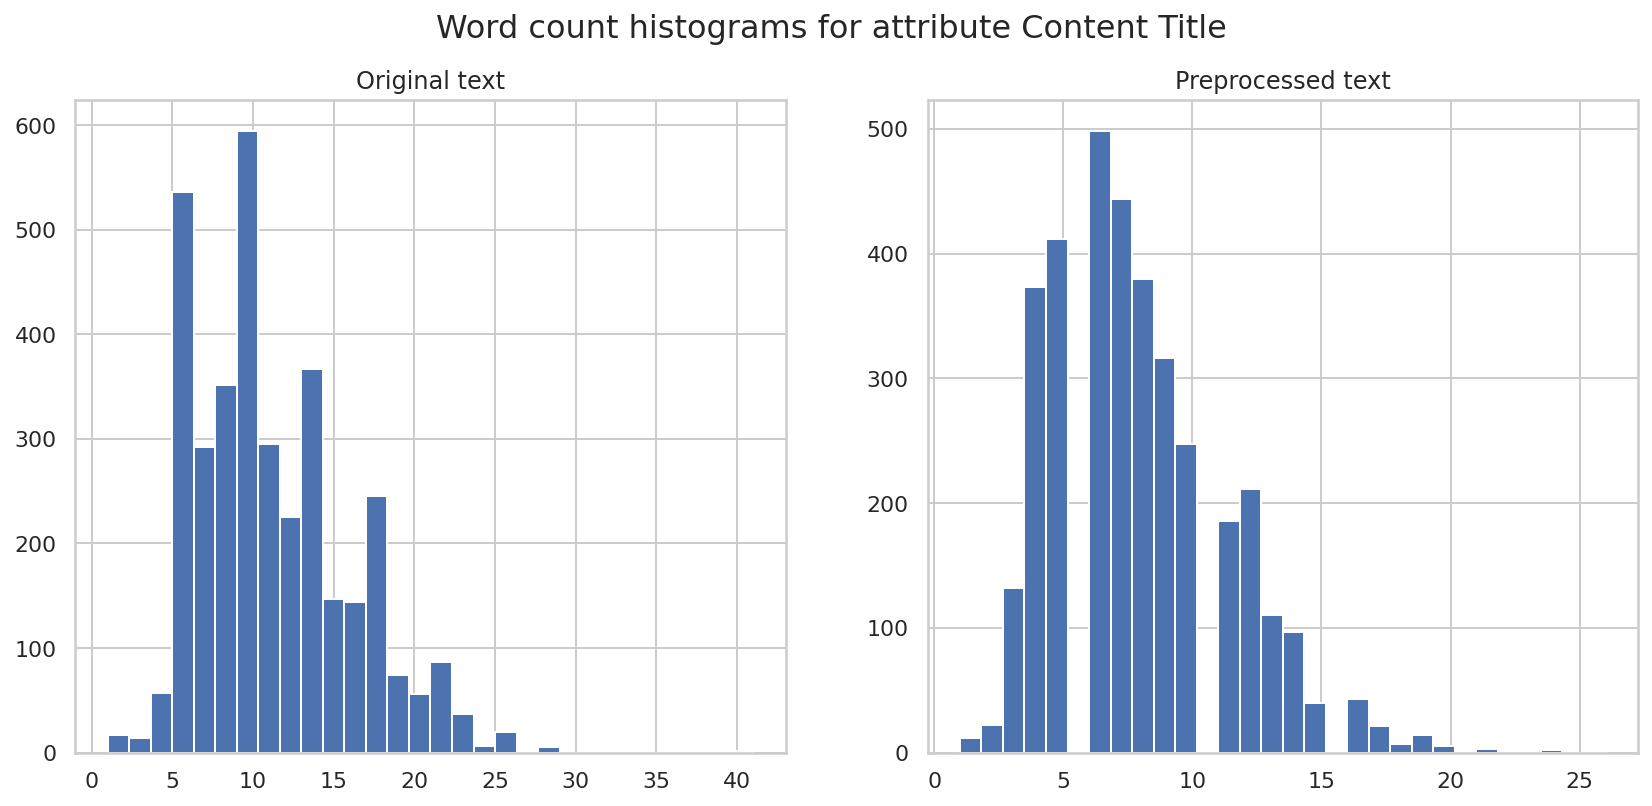

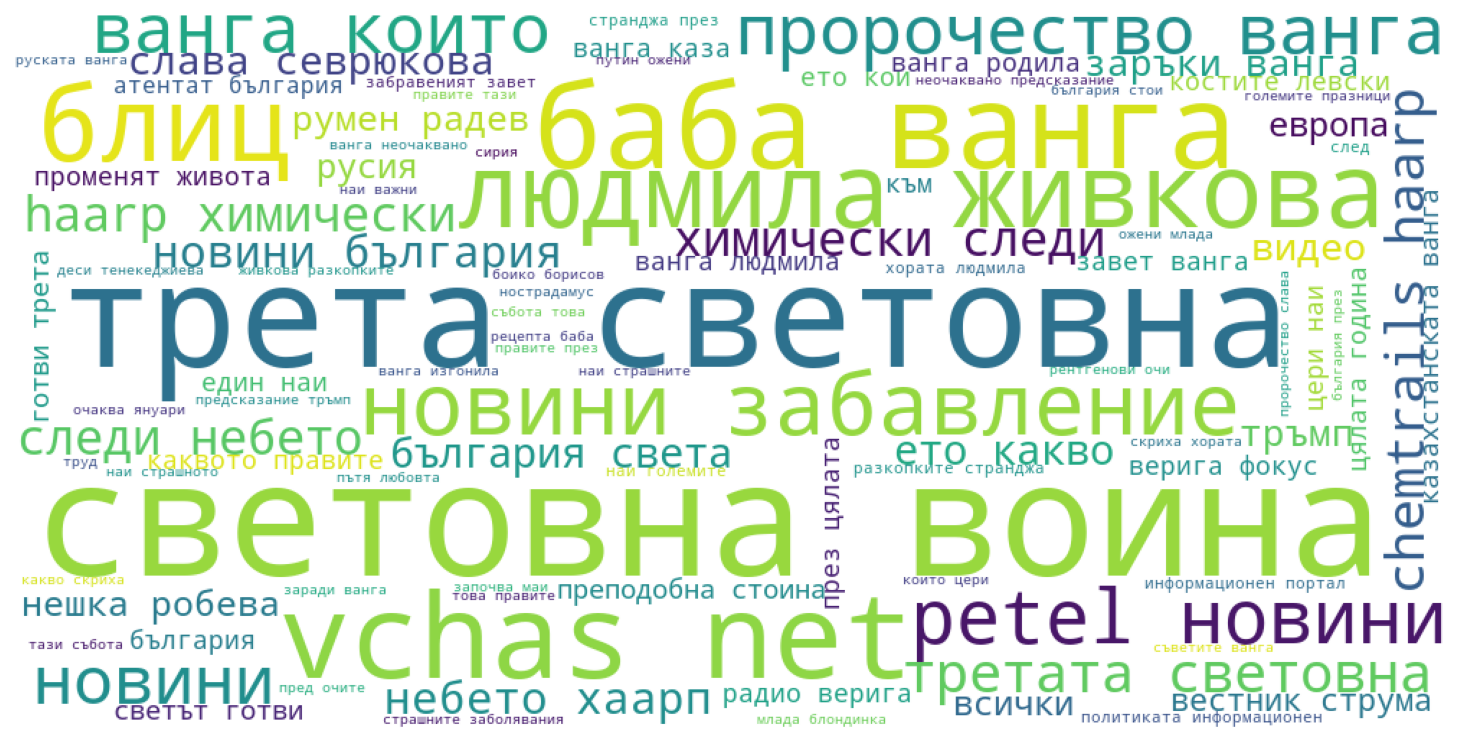



Analysis of attribute "Content"


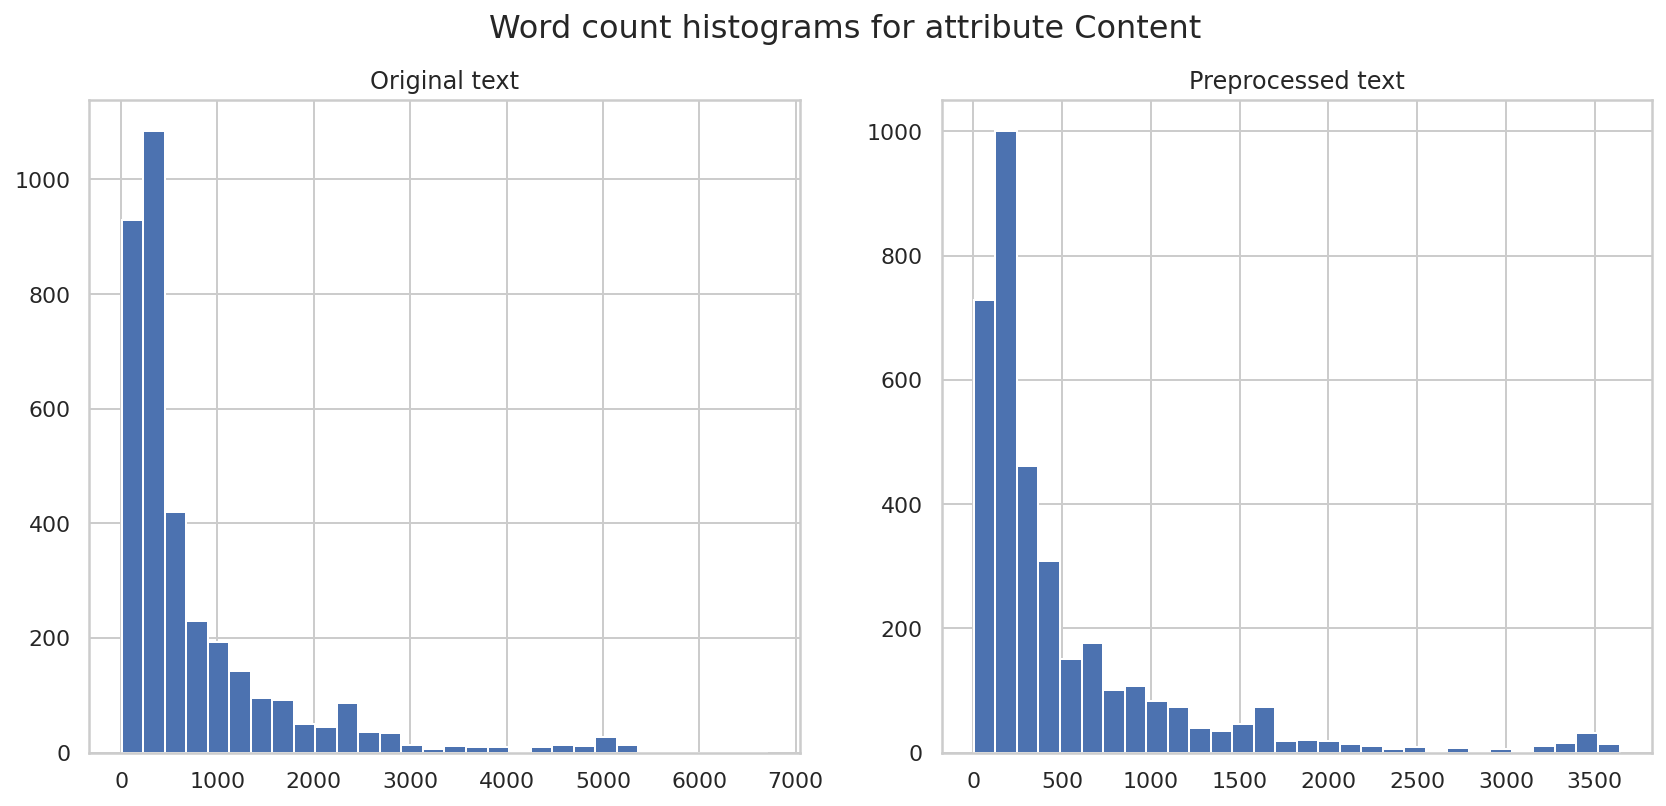

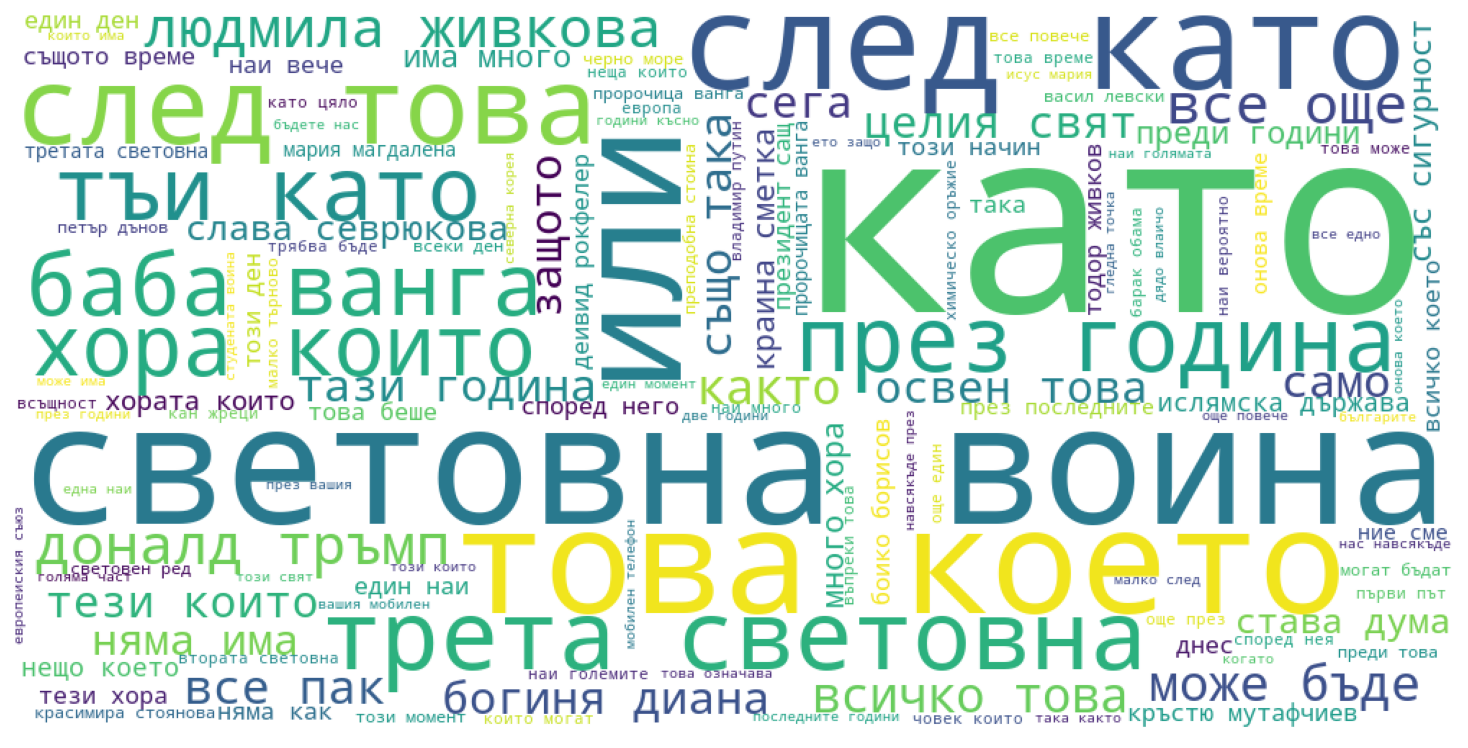

In [18]:
analyse_textual_attributes(df, textual_attributes)

## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

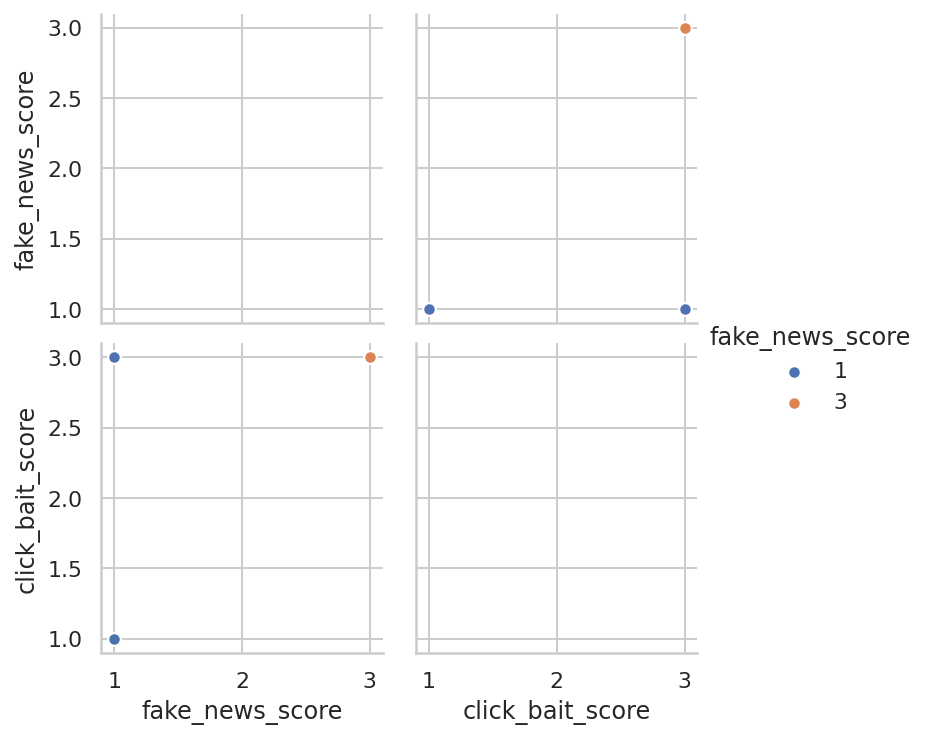

In [19]:
if numerical_attributes and len(numerical_attributes) > 1:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column);

### Correlations

Correlation matrix:

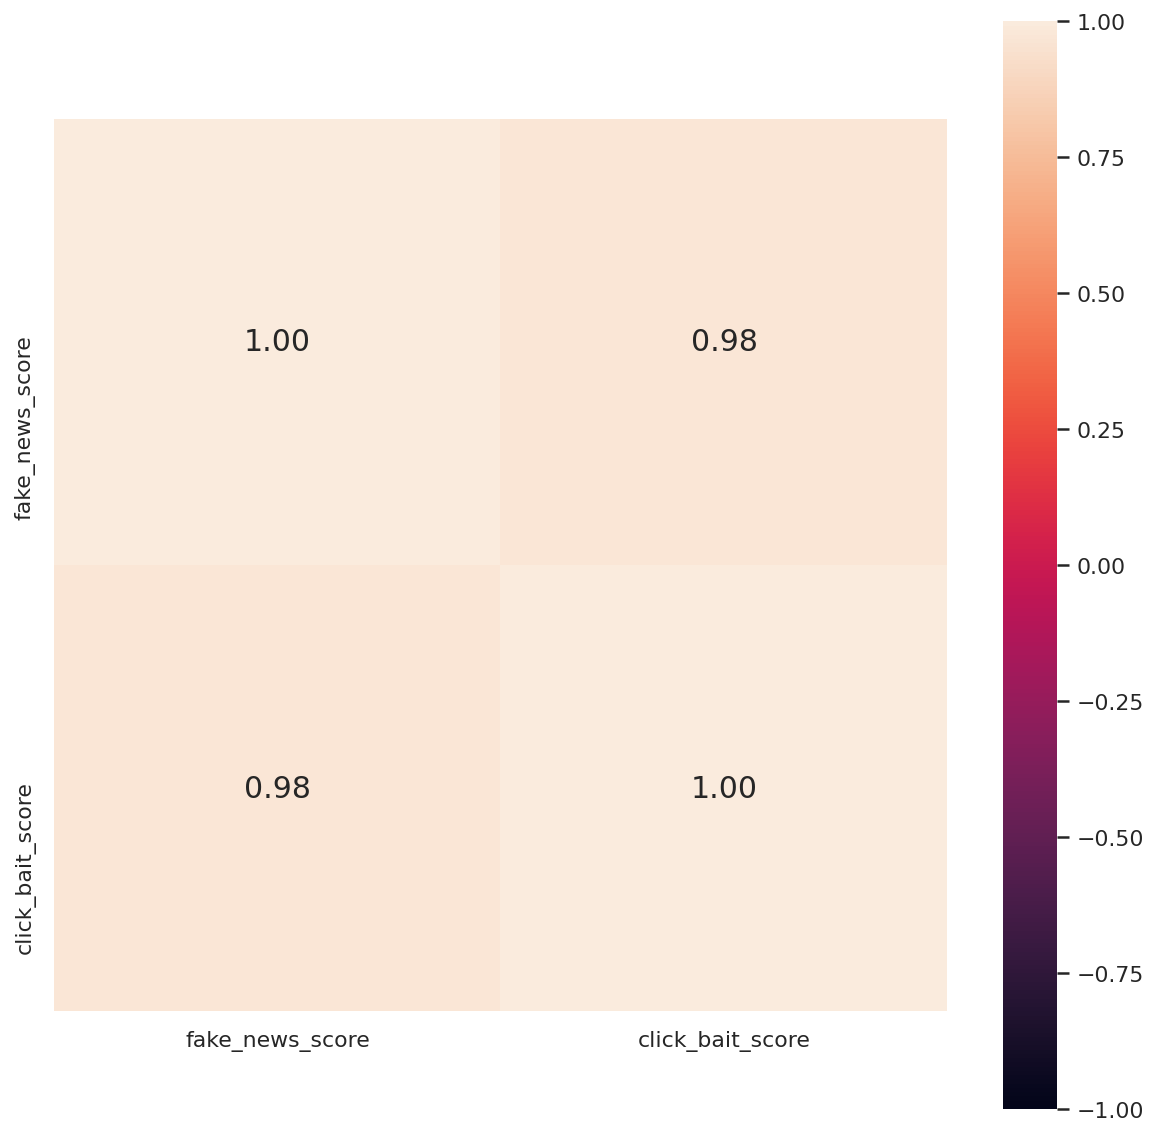

In [20]:
if numerical_attributes and len(numerical_attributes) > 1:
    check_correlations(df, numerical_attributes)